# Pan fetal reference vs. ATO G2G Analysis (CD8 Lineage with GPLVM estimates)

In [2]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scipy.stats as stats
import matplotlib.pyplot as plt
import os,sys,inspect
# setting the path to source
sys.path.insert(0,os.path.dirname(os.getcwd()) + '/source') 
# new source imports 
import OrgAlign as orgalign
import Main
import MyFunctions 
import TimeSeriesPreprocessor
import ClusterUtils
import PathwayAnalyserV2
import warnings
import scanpy as sc
warnings.filterwarnings("ignore")

adata_ref = anndata.read_h5ad('adata_ref_CD8Lineage_gplvm.h5ad')
adata_query =  anndata.read_h5ad('adata_org_SPTLineage_gplvm.h5ad')

In [3]:
adata_ref

AnnData object with n_obs × n_vars = 20324 × 2616
    obs: 'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'name', 'uniform_label', 'uniform_label_expanded_merged', 'uniform_label_lvl0', 'organ', 'Sample.lanes', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Processing_method', 'AnnatomicalPart', 'Sample', 'bbk', 'scvi_clusters', 'anno_lvl_2_LYMPHOID', 'anno_lvl_2_MYELOID', 'anno_lvl_2_MEM_PROGENITORS', 'leiden_150', 'ANNOTATION', 'batch', 'ATO_days', 'ID', 'sanger_sample_id', 'time_id', 'new_annotation', 'percent_total_mito_UMI', '_scvi_batch', '_scvi_labels', 'ANNOTATION_COMB', 'new_approx_time', 'refined_new_approx_time', 'normalised_capture_time', 'gplvm_pseudotime'
    var: 'GeneID-0', 'GeneName-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'mt-1', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ANNOTATION_COMB_colors', 'ANNOTATION_colors', 'ID_colors', '_scvi_manager_uuid', '_scvi_uuid', 

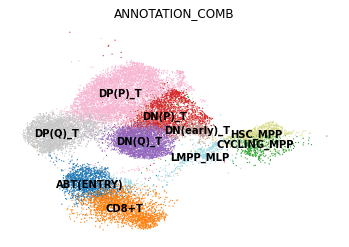

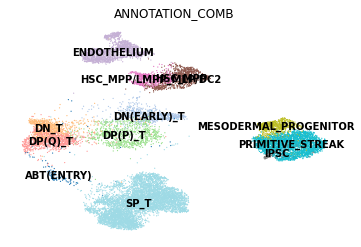

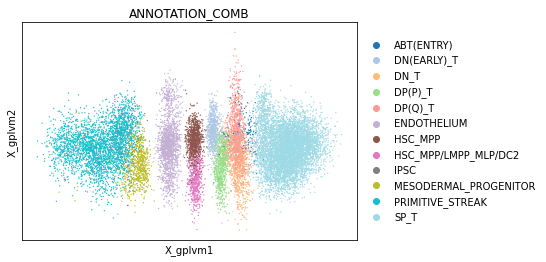

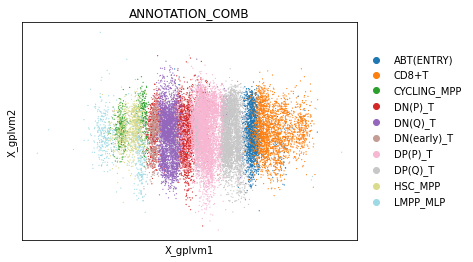

In [4]:
sc.pl.umap(adata_ref,color = ['ANNOTATION_COMB'],palette='tab20', frameon=False, size=6,legend_loc='on data') 
sc.pl.umap(adata_query,color = ['ANNOTATION_COMB'],palette='tab20', frameon=False, size=6,legend_loc='on data') 
sc.pl.embedding(adata_query, 'X_gplvm', color='ANNOTATION_COMB')
sc.pl.embedding(adata_ref, 'X_gplvm', color='ANNOTATION_COMB')

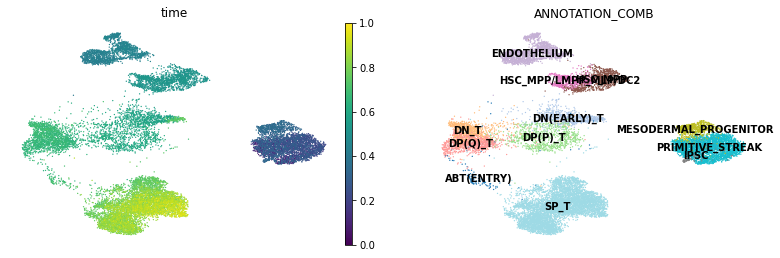

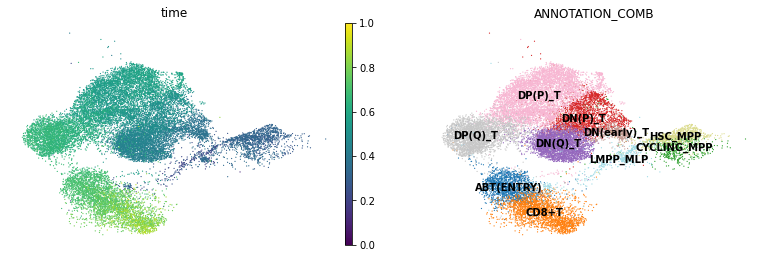

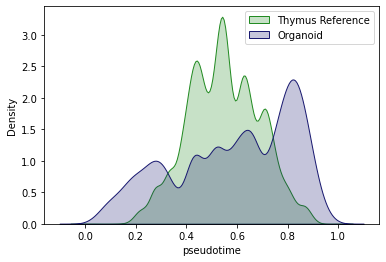

In [5]:
# normalising the pseudotime to [0,1] range
x = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_ref.obs.gplvm_pseudotime))
adata_ref.obs['time'] = x
x = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_query.obs.gplvm_pseudotime))
adata_query.obs['time'] = x

sc.pl.umap(adata_query,color = ['time','ANNOTATION_COMB'],palette='tab20',legend_loc='on data',frameon=False)
sc.pl.umap(adata_ref,color = ['time','ANNOTATION_COMB'],palette='tab20',legend_loc='on data', frameon=False)

sb.kdeplot(adata_ref.obs['time'], fill=True, label='Thymus Reference', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='Organoid', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.show()

In [6]:
np.unique(adata_ref.obs.ANNOTATION_COMB, return_counts=True)

(array(['ABT(ENTRY)', 'CD8+T', 'CYCLING_MPP', 'DN(P)_T', 'DN(Q)_T',
        'DN(early)_T', 'DP(P)_T', 'DP(Q)_T', 'HSC_MPP', 'LMPP_MLP'],
       dtype=object),
 array([1696, 2192,  536, 2354, 3283,  500, 5486, 2979,  803,  495]))

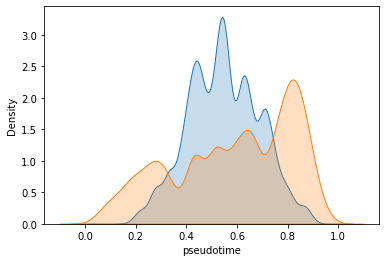

preprocessing
preprocessing


In [7]:
adata_ref_all_genes = anndata.read_h5ad('adata_ref_CD8Lineage_all_genes_b4_preprocessing.h5ad')
adata_query_all_genes =  anndata.read_h5ad('adata_ato_SPTLineage_all_genes_b4_preprocessing.h5ad')

adata_ref_bck = adata_ref.copy()
adata_query_bck = adata_query.copy()

adata_ref_temp = anndata.AnnData(X=adata_ref_all_genes[adata_ref.obs_names].X)
adata_ref_temp.var_names = adata_ref_all_genes[adata_ref.obs_names].var_names
adata_ref_temp.obs_names = adata_ref.obs_names
adata_ref_temp.obs['ANNOTATION_COMB'] = adata_ref.obs['ANNOTATION_COMB']
adata_ref_temp.obs['time'] = adata_ref.obs['time']
adata_ref_temp.obsm['X_umap'] = adata_ref.obsm['X_umap']
adata_ref_temp.obsm['X_gplvm'] = adata_ref.obsm['X_gplvm']
adata_ref_temp.obsm['X_scVI'] = adata_ref.obsm['X_scVI']
adata_ref_temp.obsp['connectivities'] = adata_ref.obsp['connectivities'] 
adata_ref_temp.obsp['distances'] = adata_ref.obsp['distances'] 
adata_ref_temp.obs['bbk'] = adata_ref.obs['bbk'] 

adata_query_temp = anndata.AnnData(X=adata_query_all_genes [adata_query.obs_names].X)
adata_query_temp.var_names = adata_query_all_genes [adata_query.obs_names].var_names
adata_query_temp.obs_names = adata_query.obs_names
adata_query_temp.obs['ANNOTATION_COMB'] = adata_query.obs['ANNOTATION_COMB']
adata_query_temp.obs['time'] = adata_query.obs['time']
adata_query_temp.obsm['X_umap'] = adata_query.obsm['X_umap']
adata_query_temp.obsm['X_gplvm'] = adata_query.obsm['X_gplvm']
adata_query_temp.obsm['X_scVI'] = adata_query.obsm['X_scVI']
adata_query_temp.obsp['connectivities'] = adata_query.obsp['connectivities'] 
adata_query_temp.obsp['distances'] = adata_query.obsp['distances'] 

adata_ref = adata_ref_temp
adata_query = adata_query_temp

# Examine ref and query pseudotime distributions
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Refernce') 
sb.kdeplot(adata_query.obs['time'], fill=True,label='Organoid'); plt.xlabel('pseudotime')
plt.show()

def preprocess(adata):
    print('preprocessing')
    sc.pp.filter_genes(adata, min_cells=3) 
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_per_cell(adata, 10000) 
    sc.pp.log1p(adata)
    return adata
adata_ref = preprocess(adata_ref)
adata_query = preprocess(adata_query)
common_genes = np.intersect1d(adata_ref.var_names, adata_query.var_names)
adata_ref = adata_ref[:,common_genes]
adata_query = adata_query[:,common_genes]

In [8]:
adata_ref.write_h5ad('PanfetalATO_CD8_gplvm_ref_21122022.h5ad')
adata_query.write_h5ad('PanfetalATO_CD8_gplvm_ATO_21122022.h5ad')

# G2G Run on human TFs

In [1]:
import anndata
import time 
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scipy.stats as stats
import matplotlib.pyplot as plt
import os,sys,inspect
import pickle
from tqdm import tqdm
# setting the path to source
sys.path.insert(0,os.path.dirname(os.getcwd()) + '/source') 
# new source imports 
import OrgAlign as orgalign
import Main
import MyFunctions 
import TimeSeriesPreprocessor
import ClusterUtils
import PathwayAnalyserV2
import VisualUtils
import colorcet as cc

adata_ref = anndata.read_h5ad('PanfetalATO_CD8_gplvm_ref_21122022.h5ad')
adata_query = anndata.read_h5ad('PanfetalATO_CD8_gplvm_ATO_21122022.h5ad')

In [2]:
adata_ref

AnnData object with n_obs × n_vars = 20324 × 20183
    obs: 'ANNOTATION_COMB', 'time', 'bbk', 'n_counts'
    var: 'n_cells'
    uns: 'log1p'
    obsm: 'X_gplvm', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [3]:
adata_query

AnnData object with n_obs × n_vars = 17176 × 20183
    obs: 'ANNOTATION_COMB', 'time', 'n_counts'
    var: 'n_cells'
    uns: 'log1p'
    obsm: 'X_gplvm', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
adata_query = adata_query[[c in ['ABT(ENTRY)', 'DN(EARLY)_T', 'DN_T', 'DP(P)_T', 'DP(Q)_T','SP_T'] for c in adata_query.obs.ANNOTATION_COMB]] 
adata_ref = adata_ref[[c in ['DN(P)_T', 'DN(Q)_T', 'DN(early)_T', 'ABT(ENTRY)', 'DP(P)_T', 'DP(Q)_T','CD8+T'] for c in adata_ref.obs.ANNOTATION_COMB]] 

In [5]:
adata_ref

View of AnnData object with n_obs × n_vars = 18490 × 20183
    obs: 'ANNOTATION_COMB', 'time', 'bbk', 'n_counts'
    var: 'n_cells'
    uns: 'log1p'
    obsm: 'X_gplvm', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:
adata_query

View of AnnData object with n_obs × n_vars = 10089 × 20183
    obs: 'ANNOTATION_COMB', 'time', 'n_counts'
    var: 'n_cells'
    uns: 'log1p'
    obsm: 'X_gplvm', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

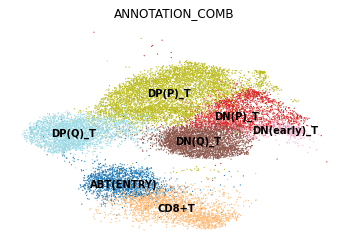

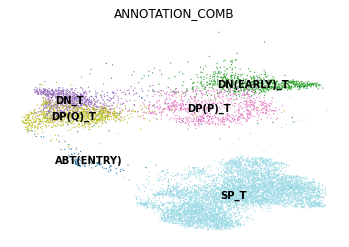

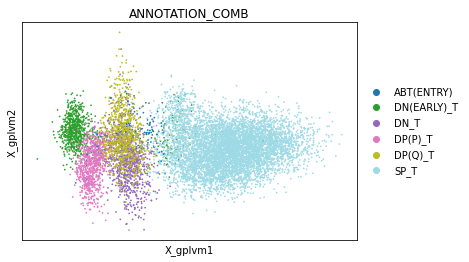

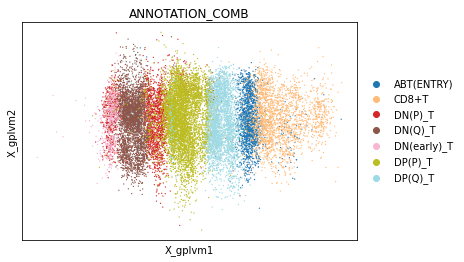

In [7]:
sc.pl.umap(adata_ref,color = ['ANNOTATION_COMB'],palette='tab20', frameon=False, size=6,legend_loc='on data') 
sc.pl.umap(adata_query,color = ['ANNOTATION_COMB'],palette='tab20', frameon=False, size=6,legend_loc='on data') 
sc.pl.embedding(adata_query, 'X_gplvm', color='ANNOTATION_COMB')
sc.pl.embedding(adata_ref, 'X_gplvm', color='ANNOTATION_COMB')

preprocessing
preprocessing


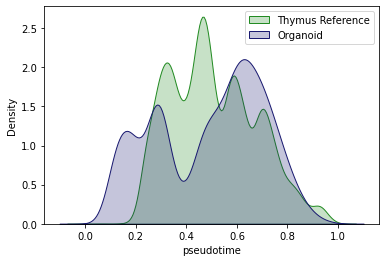

In [8]:
del adata_ref.uns['log1p']
del adata_query.uns['log1p']
adata_ref.X = adata_ref.layers['counts']
adata_query.X = adata_query.layers['counts']
def preprocess(adata):
    print('preprocessing')
    sc.pp.filter_genes(adata, min_cells=3) 
    adata.layers["counts"] = adata.X.copy()
    sc.pp.normalize_per_cell(adata, 10000) 
    sc.pp.log1p(adata)
    return adata
adata_ref = preprocess(adata_ref)
adata_query = preprocess(adata_query)
common_genes = np.intersect1d(adata_ref.var_names, adata_query.var_names)
adata_ref = adata_ref[:,common_genes]
adata_query = adata_query[:,common_genes]
# normalising the pseudotime to [0,1] range
x = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_ref.obs.time))
adata_ref.obs['time'] = x
x = TimeSeriesPreprocessor.Utils.minmax_normalise(np.asarray(adata_query.obs.time))
adata_query.obs['time'] = x
sb.kdeplot(adata_ref.obs['time'], fill=True, label='Thymus Reference', color='forestgreen') 
sb.kdeplot(adata_query.obs['time'], fill=True, label='Organoid', color='midnightblue'); plt.xlabel('pseudotime'); plt.legend()
plt.show()

In [9]:
adata_ref.obs['time'] = TimeSeriesPreprocessor.refine_pseudotime(adata_ref)
adata_query.obs['time'] = TimeSeriesPreprocessor.refine_pseudotime(adata_query)

(-0.25, 15.95, 0.0, 105.00000000000001)

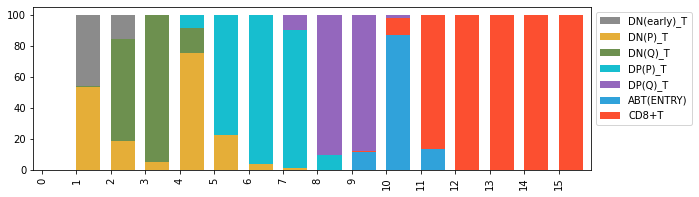

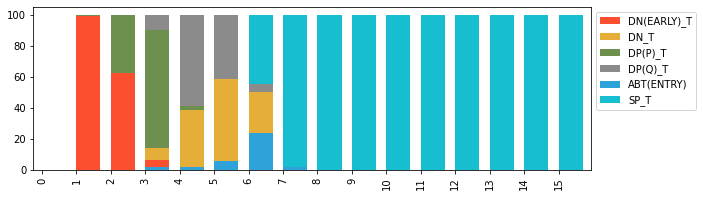

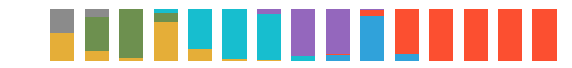

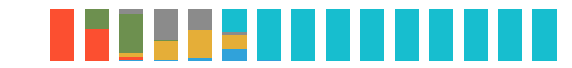

In [10]:
# Bins visualisation --- Each cell is annotatated with its respective bin based on the closest interpolated pseudotime point
# There n_artificial_points = 15 bin margins within the [0,1) range 
# for all cells with pseudotime t>=bin_margins[i] and t<bin_margins[i+1], allocate bin id as i; 
# for final bin  t>=bin_margins[i] and t<=bin_margins[i+1]
# then we plot cell type proportions for each bin 0-14

vs = VisualUtils.VisualUtils(adata_ref, adata_query, cell_type_colname = 'ANNOTATION_COMB', 
                S_len=15, 
                T_len=15, 
                titleS='Thymus (Reference)', titleT='ATO (Query)',
                write_file=False)

ax = vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=sb.color_palette(cc.glasbey_hv, n_colors=20), grid = False, legend=True, width=0.7,align='edge',figsize=(10,3))
order_S_legend = [4,2,3,5,6,0,1]
order_T_legend = [1,2,3,4,0,5]
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[handles[idx] for idx in order_S_legend],labels=[labels[idx] for idx in order_S_legend],bbox_to_anchor=(1.0, 1.0))
#plt.legend(title='Cell Type',bbox_to_anchor=(1.2, 0.2))
ax = vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=sb.color_palette(cc.glasbey_hv, n_colors=12), grid = False, legend=True, width=0.7,align='edge',figsize=(10,3))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[handles[idx] for idx in order_T_legend],labels=[labels[idx] for idx in order_T_legend],bbox_to_anchor=(1.0, 1.0))
vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=sb.color_palette(cc.glasbey_hv, n_colors=12), grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
plt.axis('off')
vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=sb.color_palette(cc.glasbey_hv, n_colors=12), grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
plt.axis('off')

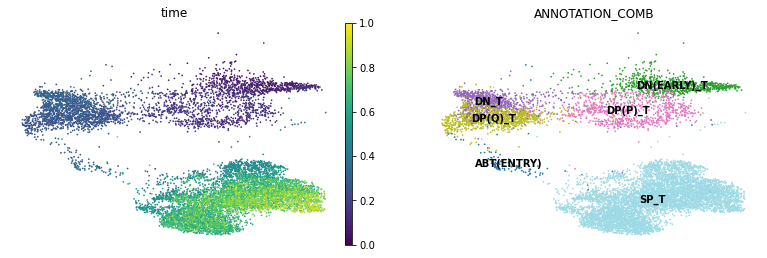

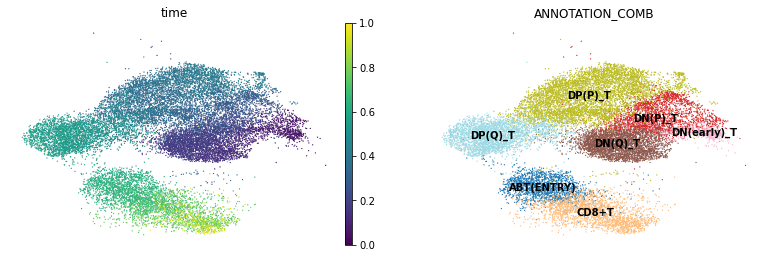

In [11]:
sc.pl.umap(adata_query,color = ['time','ANNOTATION_COMB'],palette='tab20',legend_loc='on data',frameon=False)
sc.pl.umap(adata_ref,color = ['time','ANNOTATION_COMB'],palette='tab20',legend_loc='on data', frameon=False)

In [12]:
# Load the Human TF list
def get_human_TF_list(): 
    # get a human TF list 
    TF_list = pd.read_csv('huamn_TF_list.csv',skiprows=1)
    np.unique(TF_list['Unnamed: 3'], return_counts=True) # There are only 1639 true TFs out of 2765 TFs in this list 
    TF_list = TF_list[TF_list['Unnamed: 3']=='Yes']
    TF_list['Name']
    return TF_list
human_TFs = get_human_TF_list()
human_TFs = np.intersect1d(human_TFs.Name, adata_ref.var_names) 

In [13]:
def run_G2G_alignment(adata_ref, adata_query, gene_list, n_interpolation_timepoints=15):
    start_t = time.time()
    aligner = Main.RefQueryAligner(adata_ref, adata_query, gene_list,n_interpolation_timepoints)
    aligner.WEIGHT_BY_CELL_DENSITY = True
    aligner.WINDOW_SIZE=0.1
    aligner.align_all_pairs() 
    end_t = time.time()
    print(end_t-start_t)
    return aligner

In [14]:
gene_list = human_TFs 
aligner = run_G2G_alignment(adata_ref, adata_query, gene_list, n_interpolation_timepoints=15)

  0%|          | 0/1219 [00:00<?, ?it/s]

6980.340380430222


In [15]:
pickle.dump(aligner, open('Aligner_CD8_humanTFs_DNonwards_03012023_winsize0.1.pkl', 'wb')) 

In [16]:
adata_ref.write_h5ad('PanfetalATO_CD8_DNonwards_gplvm_ref_03012023.h5ad')
adata_query.write_h5ad('PanfetalATO_CD8_DNonwards_gplvm_ATO_03012023.h5ad')

In [19]:
adata_query

AnnData object with n_obs × n_vars = 10089 × 17696
    obs: 'ANNOTATION_COMB', 'time', 'n_counts', 'refined_time', 'bin_ids'
    var: 'n_cells'
    uns: 'ANNOTATION_COMB_colors', 'log1p'
    obsm: 'X_gplvm', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

# G2G Analysis 

In [1]:
import anndata
import time 
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scipy.stats as stats
import matplotlib.pyplot as plt
import os,sys,inspect
import pickle
from tqdm import tqdm
# setting the path to source
sys.path.insert(0,os.path.dirname(os.getcwd()) + '/source') 
# new source imports 
import OrgAlign as orgalign
import Main
import MyFunctions 
import TimeSeriesPreprocessor
import ClusterUtils
import PathwayAnalyserV2
import VisualUtils
import colorcet as cc


#  window size = 0.1
# Load relevant adata ref and ATO objects and the G2G aligner obj
adata_ref = anndata.read_h5ad('PanfetalATO_CD8_DNonwards_gplvm_ref_03012023.h5ad')
adata_query = anndata.read_h5ad('PanfetalATO_CD8_DNonwards_gplvm_ATO_03012023.h5ad')
with open('/Aligner_CD8_humanTFs_DNonwards_03012023_winsize0.1.pkl', 'rb') as f:
    aligner = pickle.load(f)

IMMMMMMMMMMMMMIDD


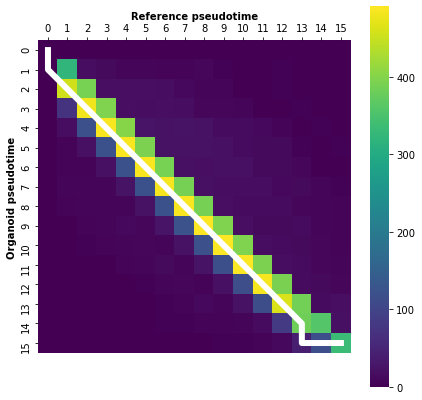

In [3]:
import VisualUtils

vs = VisualUtils.VisualUtils(adata_ref, adata_query, cell_type_colname = 'time', 
                S_len=len(aligner.results[0].S.time_points), 
                T_len=len(aligner.results[0].T.time_points), 
                titleS='Reference', titleT='Organoid',
                write_file=False)


#overall_alignment, alignment_path =vs.compute_overall_alignment(aligner)
overall_alignment, alignment_path =  ClusterUtils.get_cluster_average_alignments(aligner, aligner.gene_list)

mat = aligner.get_pairwise_match_count_mat()
print(overall_alignment)

def plot_alignment_path_on_given_matrix(mat, paths, cmap='viridis'):
        fig,ax = plt.subplots(1,1, figsize=(7,7))
        sb.heatmap(mat, square=True,  cmap='viridis', ax=ax, cbar=True)  
        for path in paths: 
            path_x = [p[0]+0.5 for p in path]
            path_y = [p[1]+0.5 for p in path]
            ax.plot(path_y, path_x, color='white', linewidth=6)
        plt.xlabel("Reference pseudotime",fontweight='bold')
        plt.ylabel("Organoid pseudotime",fontweight='bold')
        ax.xaxis.tick_top() # x axis on top
        ax.xaxis.set_label_position('top')

#plot_alignment_path_on_given_matrix(paths = [alignment_path], mat=mat, annot=False)
plot_alignment_path_on_given_matrix(paths = [alignment_path], mat=mat)
#plt.savefig('T1_vs_ATO_overall.pdf')
plt.savefig('CD8_vs_ATO_DNonwards_overall.pdf')

In [4]:
vega_20 = [
    '#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728',
    '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2',
    '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5',
]
import seaborn as sb
ref_cmap = sb.color_palette(vega_20[0:7])
ato_cmap = sb.color_palette(vega_20[0:6])

#ref_cmap = sb.color_palette(cc.glasbey_hv, n_colors=20)
#ato_cmap = sb.color_palette(cc.glasbey_hv, n_colors=12)
#sb.color_palette(vega_20)

In [5]:
np.unique(adata_query.obs.ANNOTATION_COMB)

array(['ABT(ENTRY)', 'DN(EARLY)_T', 'DN_T', 'DP(P)_T', 'DP(Q)_T', 'SP_T'],
      dtype=object)

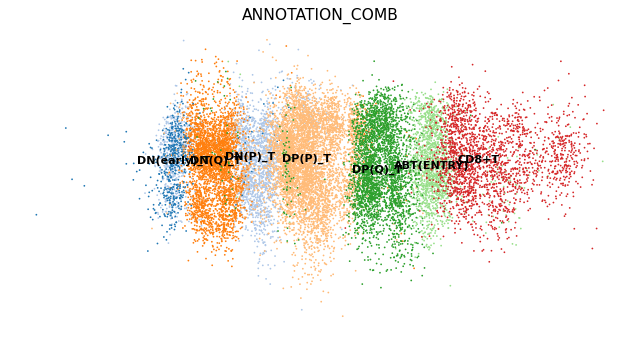

In [6]:
all_cmap = {
        'CYCLING_MPP': vega_20[12],
        'HSC_MPP':vega_20[13],
        'LMPP_MLP':vega_20[10],
        'DN(early)_T': vega_20[0],
        'DN(P)_T':vega_20[1],
        'DN(Q)_T':vega_20[2],
        'DP(P)_T': vega_20[3],
        'DP(Q)_T':vega_20[4],
        'ABT(ENTRY)':vega_20[5],
        'TYPE_1_INNATE_T':vega_20[9],
            'PRIMITIVE_STREAK': vega_20[19],
            'IPSC':  vega_20[15],
            'HSC_MPP':  vega_20[13],
            'HSC_MPP/LMPP_MLP/DC2':  vega_20[10],
            'MESODERMAL_PROGENITOR':  vega_20[17],
            'ENDOTHELIUM':vega_20[18],
            'DN(EARLY)_T':vega_20[0],
            'DN_T':vega_20[1],
            'DP(P)_T':vega_20[3],
            'DP(Q)_T':vega_20[4],
           'ABT(ENTRY)':vega_20[5],
            'CD8+T':vega_20[6]
           }
sc.set_figure_params(figsize=(10,5))
sc.pl.embedding(adata_ref, 'X_gplvm', color='ANNOTATION_COMB', legend_loc='on data',  frameon=False,legend_fontsize=10,s=10, palette=all_cmap)

(-0.25, 15.95, 0.0, 105.00000000000001)

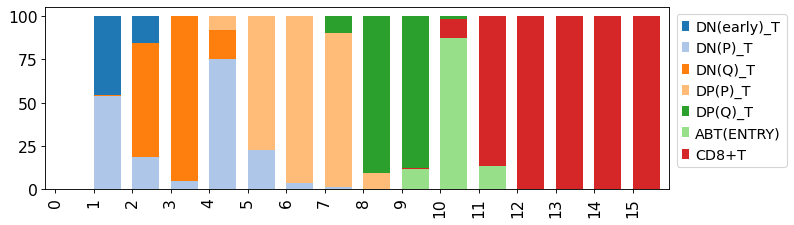

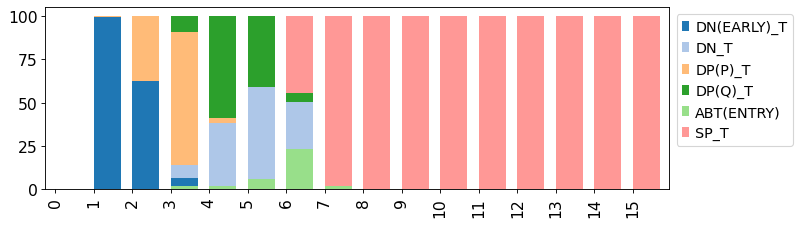

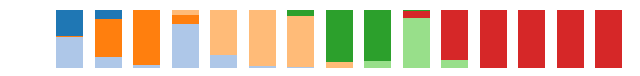

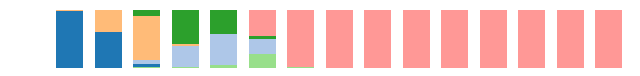

In [31]:
# Bins visualisation --- Each cell is annotatated with its respective bin based on the closest interpolated pseudotime point
# There n_artificial_points = 15 bin margins within the [0,1) range 
# for all cells with pseudotime t>=bin_margins[i] and t<bin_margins[i+1], allocate bin id as i; 
# for final bin  t>=bin_margins[i] and t<=bin_margins[i+1]
# then we plot cell type proportions for each bin 0-14

vs = VisualUtils.VisualUtils(adata_ref, adata_query, cell_type_colname = 'ANNOTATION_COMB', 
                S_len=15, 
                T_len=15, 
                titleS='Thymus (Reference)', titleT='ATO (Query)',
                write_file=False)
order_S_legend = [4,2,3,5,6,0,1]
order_T_legend = [1,2,3,4,0,5]

ref_cmap = {'DN(early)_T': vega_20[0],
        'DN(P)_T':vega_20[1],
        'DN(Q)_T':vega_20[2],
        'DP(P)_T': vega_20[3],
        'DP(Q)_T':vega_20[4],
        'ABT(ENTRY)':vega_20[5],
        'CD8+T':vega_20[6]
       }

ato_cmap = { 'DN(EARLY)_T':vega_20[0],
            'DN_T':vega_20[1],
            'DP(P)_T':vega_20[3],
            'DP(Q)_T':vega_20[4],
           'ABT(ENTRY)':vega_20[5],
            'SP_T':vega_20[7]
           }


ax = vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=ref_cmap, grid = False, legend=True, width=0.7,align='edge',figsize=(10,3))

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[handles[idx] for idx in order_S_legend],labels=[labels[idx] for idx in order_S_legend],bbox_to_anchor=(1.0, 1.0))
#plt.legend(title='Cell Type',bbox_to_anchor=(1.2, 0.2))
plt.savefig('CD8_DN_onwards_cell_composition.png', bbox_inches='tight')
ax = vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=ato_cmap, grid = False, legend=True, width=0.7,align='edge',figsize=(10,3))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[handles[idx] for idx in order_T_legend],labels=[labels[idx] for idx in order_T_legend],bbox_to_anchor=(1.0, 1.0))


vs.metaS.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=ref_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
plt.axis('off')
vs.metaT.apply(lambda x: x*100/sum(x), axis=1).plot(kind='bar',stacked=True,color=ato_cmap, grid = False, legend=False, width=0.7,align='edge',figsize=(10,1))
plt.axis('off')

In [32]:
len(aligner.gene_list)

1219

run


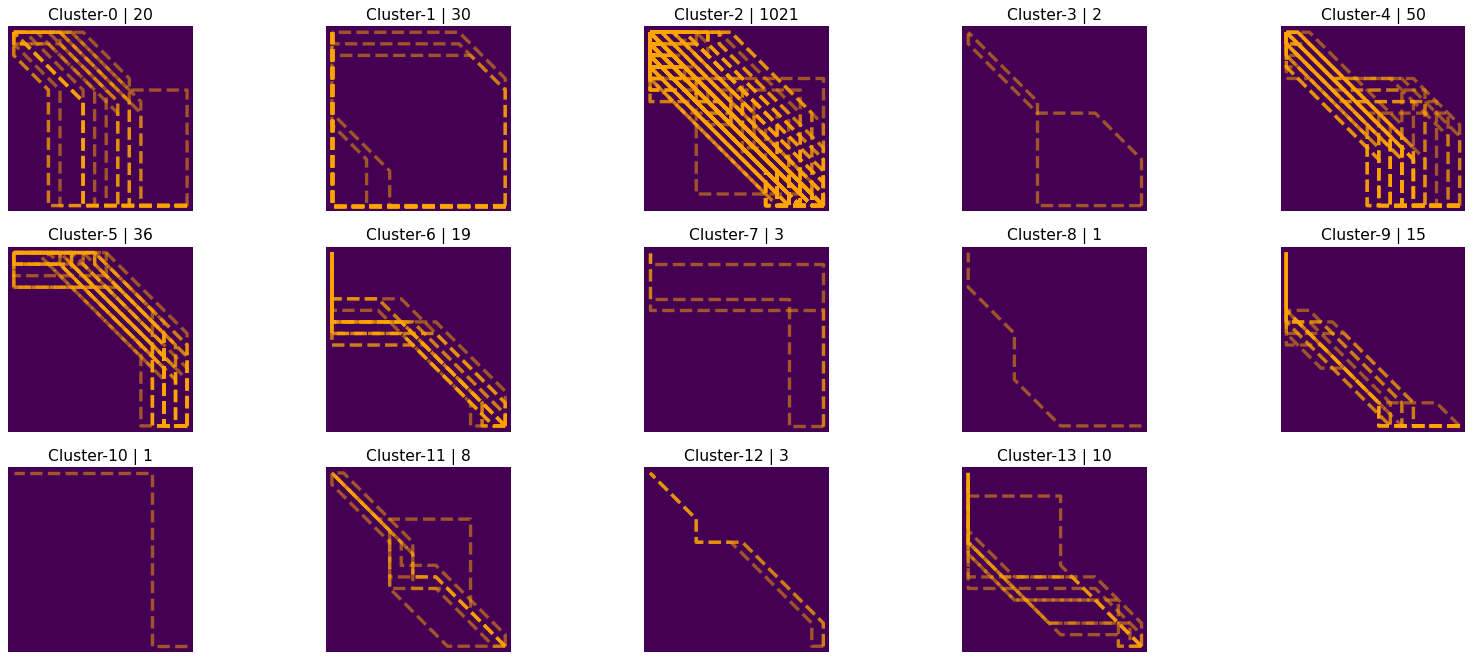

In [20]:
E = ClusterUtils.run_hierarchical_clustering_with_binary_encode_alignment_path_hamming(aligner, DIST_THRESHOLD=0.3) 
plt.savefig('results/cd8_dn_onwards_clusters.png')

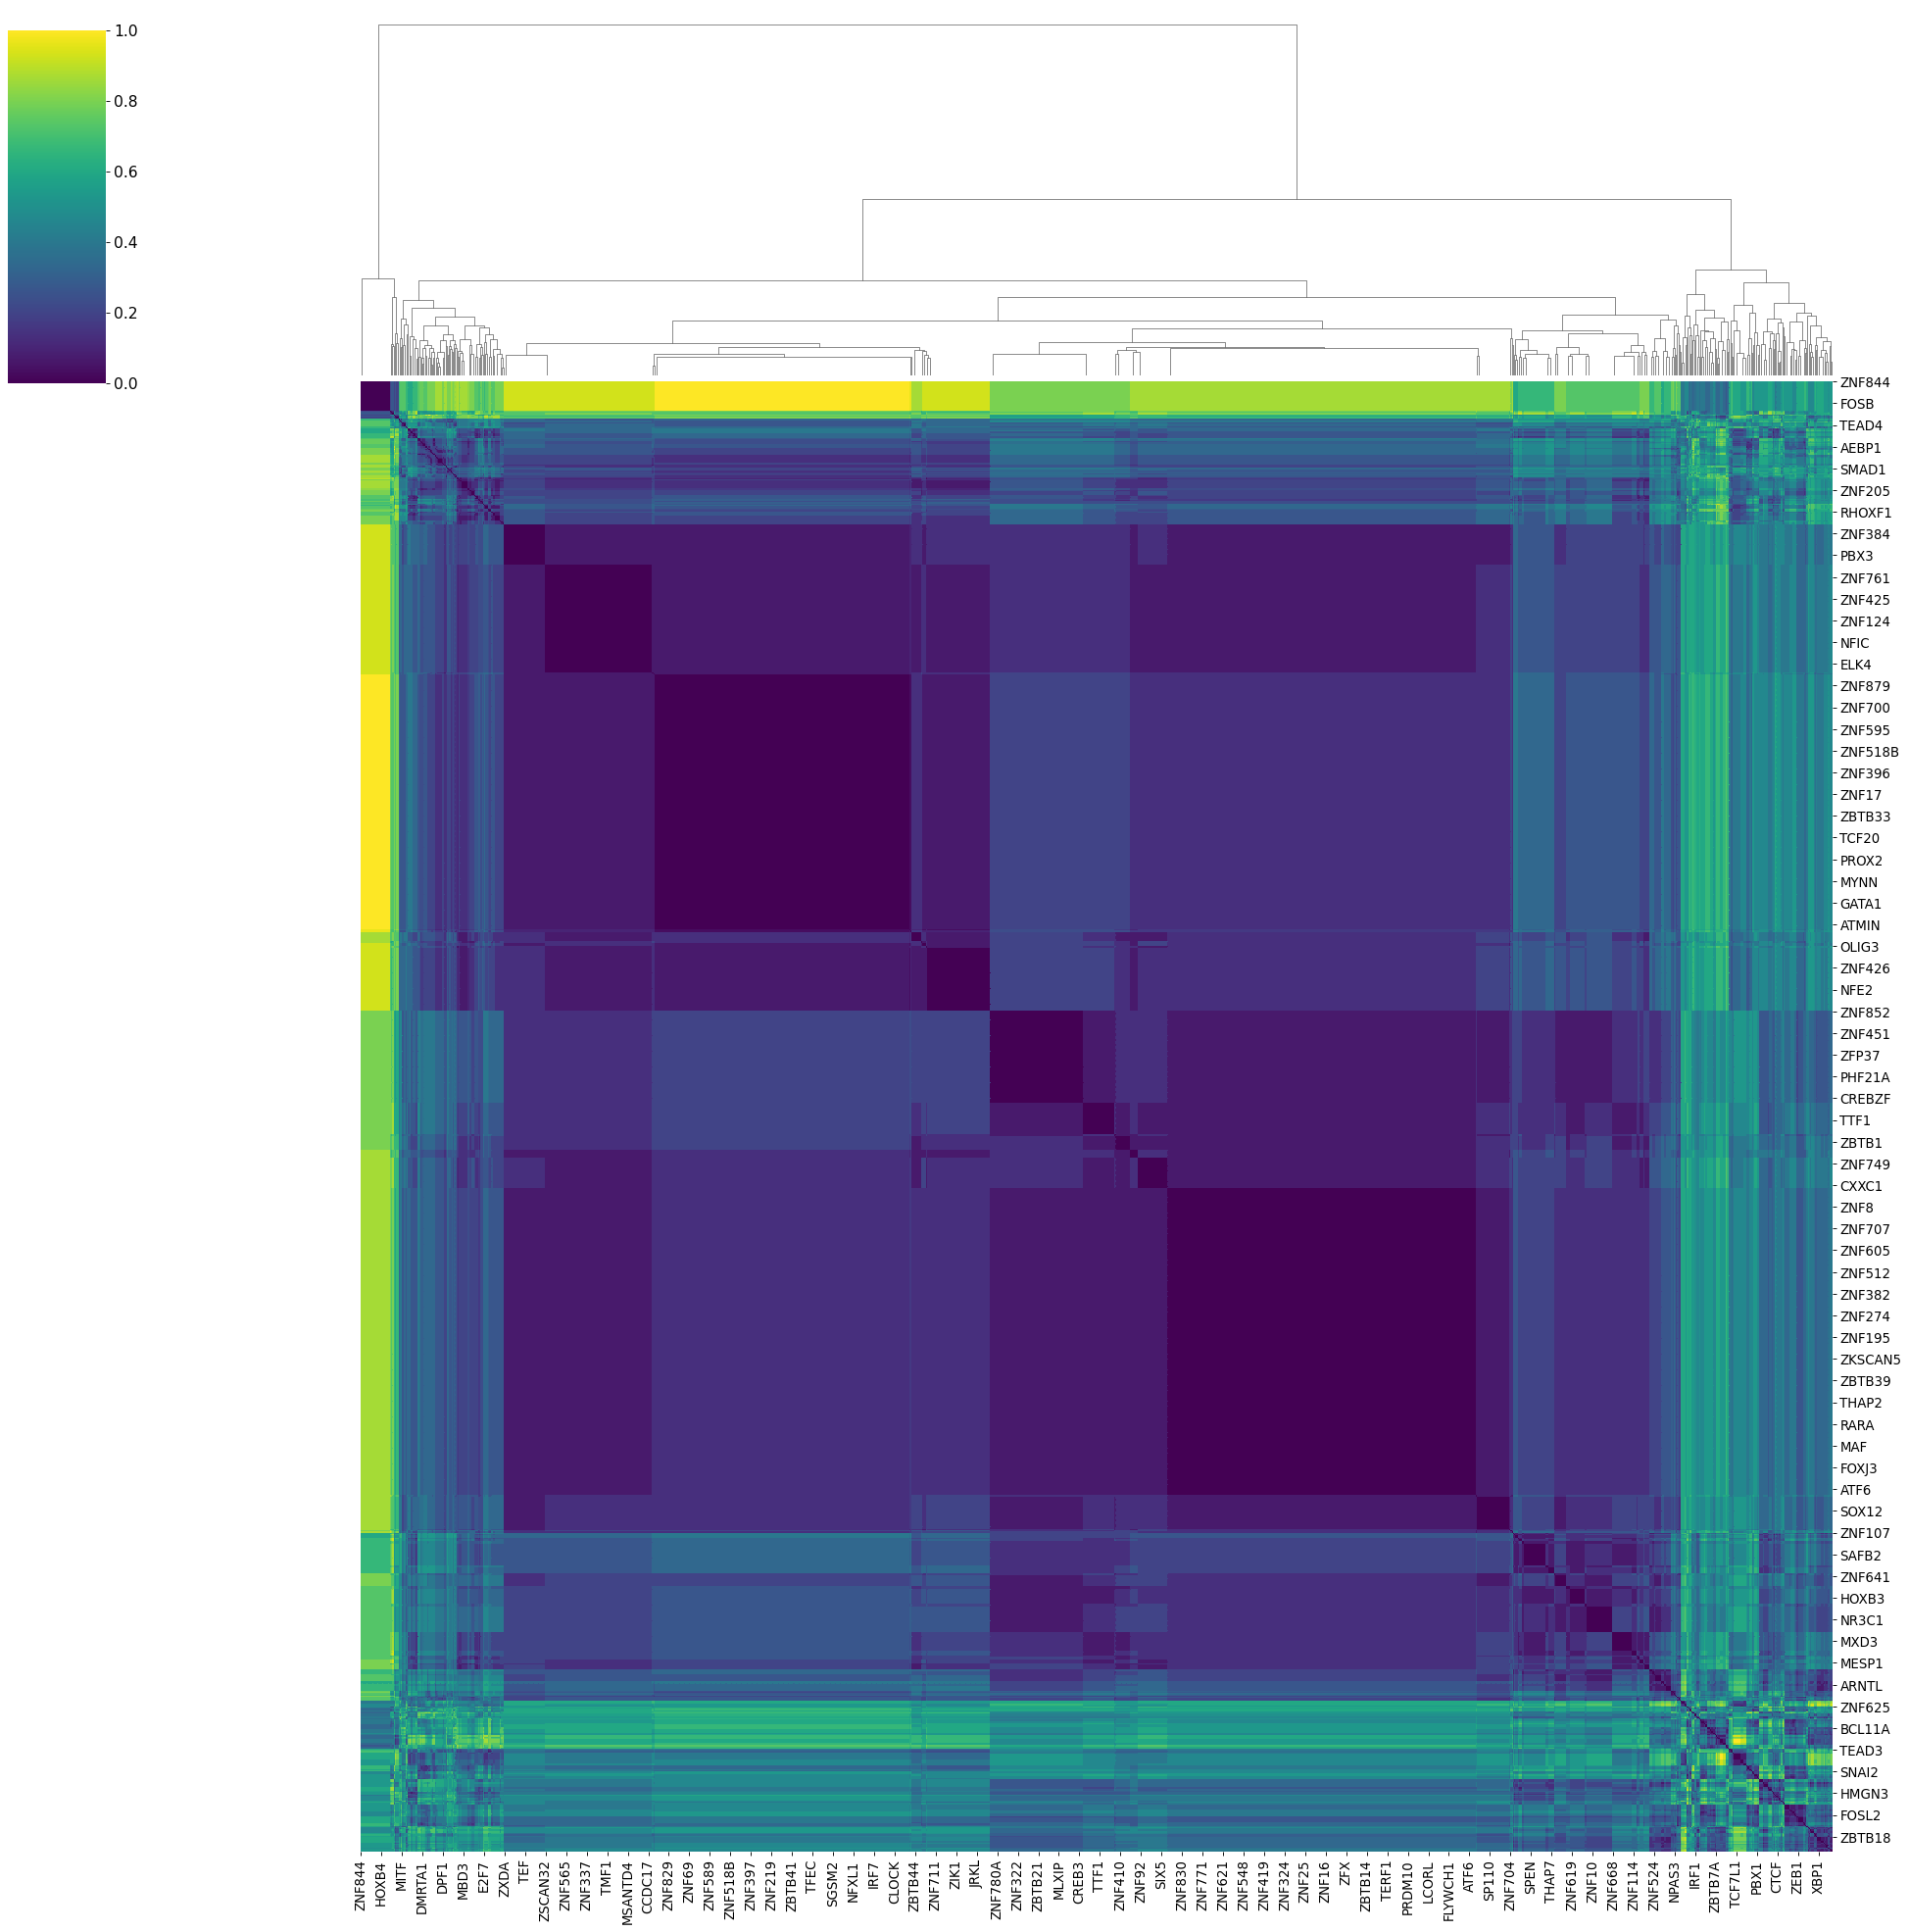

In [21]:
# Alignment distance matrix (dendrograms represent gene clusters with similar alignment patterns) 
#sb.clustermap(aligner.E,cmap='viridis' )
p = sb.clustermap(aligner.DistMat,cmap='viridis', figsize=(25,25))
p.ax_heatmap.set_xticklabels(p.ax_heatmap.get_xmajorticklabels(), fontsize = 12)
p.ax_heatmap.set_yticklabels(p.ax_heatmap.get_ymajorticklabels(), fontsize = 12)
p.ax_row_dendrogram.set_visible(False)
plt.savefig('results/CD8_dn_geneclusters.png', bbox_inches = 'tight')

In [ ]:
import PathwayAnalyserV2

# Cluster specific overepresentation analysis ---> Clusters do not necessarily output similar gene programs -- If one pathway is overrepresented in several clusters, that means 
# that particular pathway has several gene subsets which match/mismatch differently along pseudotime. 
# Such clusters reveal pathways with such varying alignments
# They could be DE or non DE; Also a cluster might not have any significant overepresentation result as well

PathwayAnalyserV2.run_cluster_overrepresentation_analysis(aligner)

120  # of DE genes to check


,Pathways,Pathway genes,Source
0,TNF-alpha Signaling via NF-kB,KLF10;JUN;SMAD3;EGR3;CEBPD;FOS;KLF4;KLF2;RELB;...,MSigDB_Hallmark_2020
1,p53 Pathway,JUN;ZBTB16;FOS;MXD1;KLF4;ATF3;TP63;ZNF365,MSigDB_Hallmark_2020
32,Hepatitis B,JUN;SMAD3;EGR3;STAT4;NFATC2;FOS;ATF4;NFATC4,KEGG_2021_Human
34,Th1 and Th2 cell differentiation,JUN;TBX21;STAT4;NFATC2;FOS;RUNX3,KEGG_2021_Human
35,Prostate cancer,AR;TCF7;LEF1;ETV5;ATF4;NKX3-1,KEGG_2021_Human
33,Osteoclast differentiation,JUN;NFATC2;FOSB;FOS;JUNB;RELB;FOSL2,KEGG_2021_Human
37,Inflammatory bowel disease,JUN;SMAD3;TBX21;STAT4;RORA,KEGG_2021_Human
38,Th17 cell differentiation,JUN;SMAD3;TBX21;NFATC2;RORA;FOS,KEGG_2021_Human
39,Herpes simplex virus 1 infection,ZNF90;SP100;ZNF726;ZNF736;ZNF878;POU2F2;ZNF841...,KEGG_2021_Human
36,C-type lectin receptor signaling pathway,JUN;EGR3;IRF1;NFATC2;NFATC4;RELB,KEGG_2021_Human


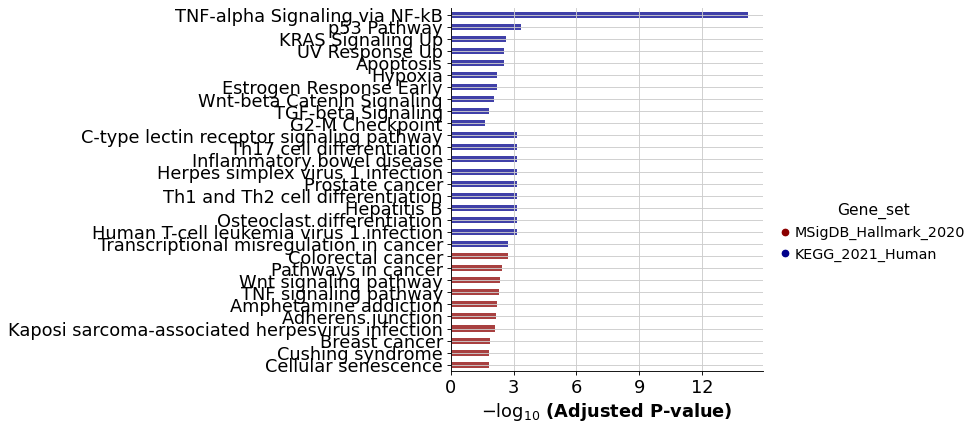

In [26]:
# Overrepresentation analysis of the top DE TFs along pseudotime based on alignment percentage < 50% 
import PathwayAnalyserV2
topDEgenes,rankedDEgenes = PathwayAnalyserV2.topkDE(aligner, DIFF_THRESHOLD=0.4)
df = PathwayAnalyserV2.run_overrepresentation_analysis(topDEgenes)
df.to_csv('results/CD8_dn_overrep_results_top_k_DE_threshold_0.4sim_120genes.csv')

pickle.dump(df, open('../df_enrichr_top120DE_CD8_DNonwards.pkl', 'wb')) 

PathwayAnalyserV2.plot_overrep_results(df)
df = pd.DataFrame([df.Term, df.Genes, df.Gene_set]).transpose() 
df.columns = ['Pathways','Pathway genes','Source']
df


In [34]:
#genes = aligner.show_ordered_alignments()

In [35]:
cid = 0
for cluster in aligner.gene_clusters:
    print(cid)
    for g in cluster:
        aligner.results_map[g].cluster_id = cid
    cid+=1
df = []
for g in genes:
    al_obj = aligner.results_map[g]
    df.append([g, al_obj.alignment_str, al_obj.get_series_match_percentage()[0], al_obj.cluster_id ] )
df = pd.DataFrame(df)
df.columns = ['Gene','5-state alignment string','Alignment similarity %','Cluster_id']
df

0
1
2
3
4
5
6
7
8
9
10
11
12
13


,Gene,5-state alignment string,Alignment similarity %,Cluster_id
0,ATF3,IIIIIIIIIIIIIIIDDDDDDDDDDDDDDD,0.00,1
1,CEBPD,IIIIIIIIIIIIIIIDDDDDDDDDDDDDDD,0.00,1
2,CXXC5,IIIIIIIIIIIIIIIDDDDDDDDDDDDDDD,0.00,1
3,DEAF1,IIIIIIIIIIIIIIIDDDDDDDDDDDDDDD,0.00,1
4,DLX2,IIIIIIIIIIIIIIIDDDDDDDDDDDDDDD,0.00,1
...,...,...,...,...
1214,ZNF625,IIIIIIIIDDDDDDDMMMMMMMD,30.43,6
1215,ZNF878,IIIIIIDDDDDDDDDMMMMMMIII,25.00,6
1216,BCL6B,IIIIIIIIDDDDDDDDMMMMMMM,30.43,6
1217,HES7,IIIIIIIDDDDDDDDDMMMMMMII,25.00,6


In [36]:
len(np.unique(df['Cluster_id']))

14

In [37]:
df.to_csv('results/CD8_DN_gene_alignments.csv')


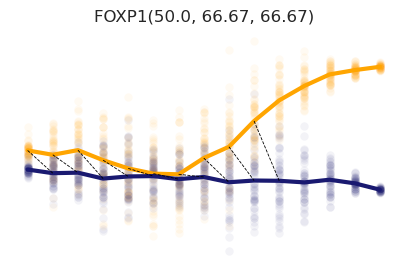

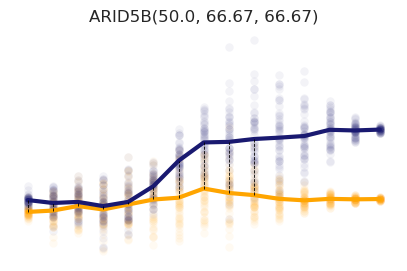

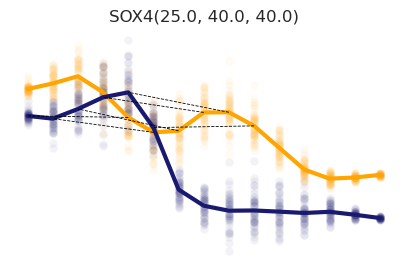

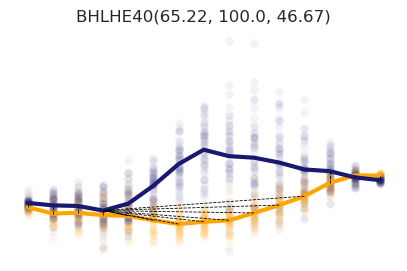

In [105]:
def plotTimeSeries(al_obj, refQueryAlignerObj, adata_ref, adata_query, plot_mean_trend= False):
       # plt.subplots(1,3,figsize=(15,3))
        plt.subplots(1,1,figsize=(5,3))
       # plt.subplot(1,3,1)
        plotTimeSeriesAlignment(al_obj) 
        return 
        plt.subplot(1,3,2)
        
        query_capture_time_labels = np.asarray(adata_query.obs.time)
        ref_capture_time_labels = np.asarray(adata_ref.obs.time)

        g = sb.scatterplot(refQueryAlignerObj.query_time, np.asarray(refQueryAlignerObj.query_mat[al_obj.gene]), hue=query_capture_time_labels,  
                           palette=sb.color_palette("light:#191970", as_cmap=True), legend=False, edgecolor='k',linewidth=0.3) 
        plt.title('Organoid')
        plt.xlabel('pseudotime')
        plt.ylabel('log1p expression')
        sb.scatterplot(refQueryAlignerObj.ref_time, np.asarray(refQueryAlignerObj.ref_mat[al_obj.gene]), color = 'black', alpha=0.1, legend=False, marker='+')
        plt.subplot(1,3,3)
        sb.scatterplot(refQueryAlignerObj.ref_time, np.asarray(refQueryAlignerObj.ref_mat[al_obj.gene]), color = 'orange', hue=ref_capture_time_labels, 
                         palette=sb.color_palette("blend:#C8DBC8,#94C47D,#628D56,#335A30", as_cmap=True), legend=False, edgecolor='k',linewidth=0.3 )
        plt.title('Reference')
        plt.xlabel('pseudotime')
        plt.ylabel('log1p expression')
        sb.scatterplot(refQueryAlignerObj.query_time, np.asarray(refQueryAlignerObj.query_mat[al_obj.gene]), color = 'black', alpha=0.1, legend=False, marker='+')
        
            
def plotTimeSeriesAlignment(al_obj):  
        sb.scatterplot(al_obj.S.X, al_obj.S.Y, color = 'orange' ,alpha=0.05, legend=False)#, label='Ref') 
        sb.scatterplot(al_obj.T.X, al_obj.T.Y, color = 'midnightblue' ,alpha=0.05, legend=False)#, label ='Query') 
       # plt.legend(loc='upper left')
        #al_obj.plot_mean_trends() 
        al_obj.S.plot_mean_trend(color='orange')
        al_obj.T.plot_mean_trend(color='midnightblue')
        plt.title(al_obj.gene + str(al_obj.get_series_match_percentage()))
        plt.xlabel('pseudotime')
        plt.ylabel('log1p expression')
        plt.axis('off')
        
        for i in range(al_obj.matched_region_DE_info.shape[0]):
            S_timebin = int(al_obj.matched_region_DE_info.iloc[i]['ref_bin'])
            T_timebin = int(al_obj.matched_region_DE_info.iloc[i]['query_bin']) 
            x_vals = [al_obj.matched_region_DE_info.iloc[i]['ref_pseudotime'],al_obj.matched_region_DE_info.iloc[i]['query_pseudotime']] 
            y_vals = [al_obj.S.mean_trend[S_timebin ], al_obj.T.mean_trend[T_timebin]] 
            plt.plot(x_vals, y_vals, color='black', linestyle='dashed', linewidth=0.6)
            
def plot_boxplots(geneset, adata_R, adata_Q):
    i=1
    plt.subplots(2,5,figsize=(15,6))
    for gene in geneset:
        ref_data = list(np.asarray(adata_R[:,gene].X.todense()).flatten()) 
        query_data = list(np.asarray(adata_Q[:,gene].X.todense()).flatten())
        df = pd.DataFrame([ref_data+ query_data,list(np.repeat('Reference', len(ref_data))) + list(np.repeat('Organoid', len(query_data))) ]).transpose()
        df.columns = ['expr','system']
        df['expr'] = np.asarray(df['expr'], dtype=float)
        plt.subplot(2,5,i)
        ax = sb.boxplot(data=df, y='expr',x='system', palette=['orange','midnightblue'], width =0.5, notch=True, showcaps=False,flierprops={"marker": "x"}, 
                       boxprops={ 'edgecolor':'grey'})#, alpha=0.1) 
        plt.setp(ax.collections, alpha=.3)
        plt.xlabel('')
        plt.ylabel('Gene Expression', fontsize=10)
        plt.xticks(fontsize=6)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        plt.grid(False)
        plt.title(gene, fontsize=12)
        plt.tight_layout()
        ax.set(xticklabels=[])
        ax.set(xticks=[])
        i=i+1
        if(i==11):
            break

plotTimeSeries(aligner.results_map['FOXP1'], aligner, adata_ref, adata_query)
plt.savefig('FOXP1_cd8.pdf', bbox_inches = 'tight')
plotTimeSeries(aligner.results_map['ARID5B'], aligner, adata_ref, adata_query)
plt.savefig('ARID5B_cd8.pdf', bbox_inches = 'tight')
plotTimeSeries(aligner.results_map['SOX4'], aligner, adata_ref, adata_query)
plt.savefig('SOX4_cd8.pdf', bbox_inches = 'tight')
plotTimeSeries(aligner.results_map['BHLHE40'], aligner, adata_ref, adata_query)
plt.savefig('BHLHE40_cd8.pdf', bbox_inches = 'tight')